In [1]:
##################################################
### imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import scipy as sp
import scipy.stats as sps

import math
from time import time

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import itertools

# Problem 1

In [2]:
p = 5
rho = 0.8
Sigma = np.full((p,p), rho)+(-rho+1)*np.eye(p)

In [3]:
Sigma

array([[1. , 0.8, 0.8, 0.8, 0.8],
       [0.8, 1. , 0.8, 0.8, 0.8],
       [0.8, 0.8, 1. , 0.8, 0.8],
       [0.8, 0.8, 0.8, 1. , 0.8],
       [0.8, 0.8, 0.8, 0.8, 1. ]])

In [4]:
L = np.linalg.cholesky(Sigma)

In [5]:
L

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.8       , 0.6       , 0.        , 0.        , 0.        ],
       [0.8       , 0.26666667, 0.53748385, 0.        , 0.        ],
       [0.8       , 0.26666667, 0.16537965, 0.51140831, 0.        ],
       [0.8       , 0.26666667, 0.16537965, 0.12033137, 0.49705012]])

In [6]:
L1 = L[0:2, 0:2]

### a) $(Y_1, Y_2)$ ~ $N((0, 0), \Sigma_{12})$ where $\Sigma_{12}$ is

In [7]:
L1@np.transpose(L1)

array([[1. , 0.8],
       [0.8, 1. ]])

### b) 

In [8]:
x = np.transpose([0.23, -0.65, -0.3])

First, we note it is equivalent to find the conditional distribution of $(Y_4, Y_5)$ given $Y_1 = 0.23, \, Y_2 = -0.65,$ and $Y_3 = -0.3$. Then we define $L_1$, $A$, and $L_2$ as follows.

In [9]:
L1 = L[0:3, 0:3]
L2 = L[3:5, 3:5]
A = L[3:5, 0:3]

Thus the conditional distribution of $(Y_4, Y_5)$ given $Y_1 = 0.23, \, Y_2 = -0.65,$ and $Y_3 = -0.3$ is $N(\mu_{45|123}, \Sigma_{45|123})$ where $\mu_{45|123}$ is

In [10]:
A@np.linalg.inv(L1)@x

array([-0.22153846, -0.22153846])

and $\Sigma_{45|123})$ is

In [11]:
L2@np.transpose(L2)

array([[0.26153846, 0.06153846],
       [0.06153846, 0.26153846]])

### c) L in $\Sigma = LL'$ is

In [12]:
L

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.8       , 0.6       , 0.        , 0.        , 0.        ],
       [0.8       , 0.26666667, 0.53748385, 0.        , 0.        ],
       [0.8       , 0.26666667, 0.16537965, 0.51140831, 0.        ],
       [0.8       , 0.26666667, 0.16537965, 0.12033137, 0.49705012]])

### d) $L^{-1}$ is

In [13]:
np.linalg.inv(L)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.33333333,  1.66666667,  0.        ,  0.        ,  0.        ],
       [-0.82689823, -0.82689823,  1.86052102,  0.        ,  0.        ],
       [-0.60165684, -0.60165684, -0.60165684,  1.95538472,  0.        ],
       [-0.47338107, -0.47338107, -0.47338107, -0.47338107,  2.01186954]])

### e) $A = PD^{\frac{1}{2}}$

In [14]:
ev, P = np.linalg.eigh(Sigma)

In [15]:
D = np.diag(ev)

In [16]:
P@np.sqrt(D)

array([[ 3.20020123e-01,  0.00000000e+00,  0.00000000e+00,
         2.39973167e-01,  9.16515139e-01],
       [-3.12358051e-01,  0.00000000e+00, -5.58570184e-17,
         2.49864860e-01,  9.16515139e-01],
       [-2.55402400e-03,  0.00000000e+00,  3.65148372e-01,
        -1.63279342e-01,  9.16515139e-01],
       [-2.55402400e-03, -3.16227766e-01, -1.82574186e-01,
        -1.63279342e-01,  9.16515139e-01],
       [-2.55402400e-03,  3.16227766e-01, -1.82574186e-01,
        -1.63279342e-01,  9.16515139e-01]])

### f)

In [17]:
ysim = L @ np.random.normal(size=(5, 10000))
df = pd.DataFrame(ysim).T
ybar = df.apply(np.mean, axis=0).values

In [18]:
sigmahat = np.zeros(Sigma.shape)
for i, r in df.iterrows():
    hold = (r.values-ybar)[:, np.newaxis]
    sigmahat += hold @ hold.T
sigmahat/= df.shape[0]

In [19]:
print(ybar)
print(sigmahat)

[0.0096619  0.00767152 0.00338953 0.00290112 0.00266758]
[[0.99358867 0.80595063 0.80931672 0.79806052 0.80461073]
 [0.80595063 1.01499931 0.8164054  0.80298267 0.81187738]
 [0.80931672 0.8164054  1.01646978 0.81051097 0.81420219]
 [0.79806052 0.80298267 0.81051097 1.00016302 0.80852963]
 [0.80461073 0.81187738 0.81420219 0.80852963 1.01087406]]


In [20]:
mu_diff = np.linalg.norm(ybar-np.zeros(p))
sigma_diff = np.linalg.norm(sigmahat - Sigma)
print("n = ", 10000)
print("Mu diff: ", mu_diff)
print("Sigma diff: ", sigma_diff)

n =  10000
Mu diff:  0.013387528088009627
Sigma diff:  0.05057825761213993


### g)

In [21]:
ysim = L @ np.random.normal(size=(5, 50))
df = pd.DataFrame(ysim).T
ybar = df.apply(np.mean, axis=0).values
sigmahat = np.zeros(Sigma.shape)
for i, r in df.iterrows():
    hold = (r.values-ybar)[:, np.newaxis]
    sigmahat += hold @ hold.T
sigmahat/= df.shape[0]
mu_diff = np.linalg.norm(ybar-np.zeros(p))
sigma_diff = np.linalg.norm(sigmahat - Sigma)
print("n = ", 50)
print("Mu diff: ", mu_diff)
print("Sigma diff: ", sigma_diff)

n =  50
Mu diff:  0.20541184830511416
Sigma diff:  1.0208336116865688


# Problem 3

In [22]:
x = np.linspace(-2, 2, 100)
fx = x**3
Io = list(range(75))
Io.extend(list(range(86, 100)))
Iu = list(range(76, 86))
X = x[Io]

In [23]:
sigf = 0.1
l = 0.1

In [24]:
Sigma = np.zeros([100, 100])

In [25]:
for i in range(100):
    for j in range(100):
        Sigma[i, j] = (sigf**2)*np.exp(-1/(2*l**2)*(x[i]-x[j])**2)

In [26]:
Sigma

array([[1.00000000e-002, 9.21618123e-003, 7.21446326e-003, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [9.21618123e-003, 1.00000000e-002, 9.21618123e-003, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [7.21446326e-003, 9.21618123e-003, 1.00000000e-002, ...,
        1.18575755e-322, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 1.18575755e-322, ...,
        1.00000000e-002, 9.21618123e-003, 7.21446326e-003],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        9.21618123e-003, 1.00000000e-002, 9.21618123e-003],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.21446326e-003, 9.21618123e-003, 1.00000000e-002]])

In [27]:
sigxx = Sigma[Io, :][:, Io]
sigyy = Sigma[Iu, :][:, Iu]
sigxy = Sigma[Io, :][:, Iu]
sigyx = np.transpose(sigxy)

In [28]:
mu_y = sigyx@np.linalg.inv(sigxx)@fx[Io]
sig_y = sigyy - np.linalg.multi_dot([sigyx, np.linalg.inv(sigxx), sigxy])

In [29]:
sample = np.random.multivariate_normal(mu_y, sig_y, 1000)
y = np.mean(sample, axis = 0)

<ipython-input-29-e7bda8616836>:1: RuntimeWarning: covariance is not positive-semidefinite.
  sample = np.random.multivariate_normal(mu_y, sig_y, 1000)


In [30]:
y

array([1.14823311, 1.09979373, 0.92636519, 0.72902555, 0.67512681,
       0.89091209, 1.37456763, 1.98331579, 2.52786137, 2.91890331])

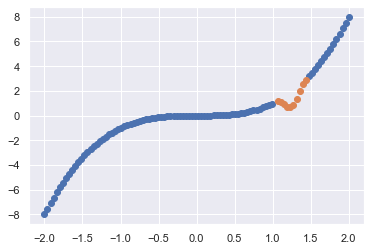

In [31]:
plt.scatter(x[Io], fx[Io])
plt.scatter(x[Iu], y)

In [32]:
np.linalg.norm(y-fx[Iu])

2.2899929886872075